In [33]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *

import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

default = 2 represent the loan got defaulted. We take this a postive event. 

In [6]:
target = "default"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
y = preprocessing.LabelEncoder().fit_transform(df[target])

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", linear_model.LogisticRegression())
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [11]:
result = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
result["match"] = result.actual == result.prediction
result.head()

,actual,prediction,match
0,1,0,False
1,0,1,False
2,0,0,True
3,1,1,True
4,1,1,True


In [16]:
result.match.value_counts() / len(result)

True     0.756667
False    0.243333
Name: match, dtype: float64

In [17]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x101ba8eb8>)

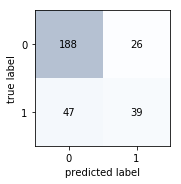

In [18]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16642dd8>)

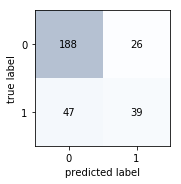

In [22]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16699278>)

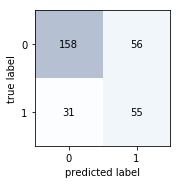

In [23]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a166df4a8>)

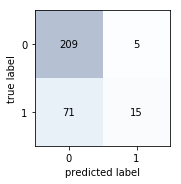

In [24]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

train accuracy: 0.7957142857142857
test accuracy: 0.7466666666666667
train precision: 0.6961325966850829
test precision: 0.75
train recall: 0.5887850467289719
test recall: 0.1744186046511628


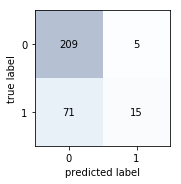

In [36]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("train accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("train precision:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("train recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))


Text(0,0.5,'TPR')

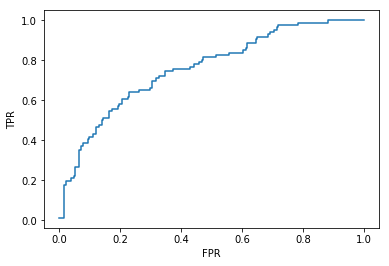

In [35]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
print("test auc:", metrics.auc(fpr, tpr))

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: " + str()  )
